# 1. Circuits and Gates

This notebook will guide you through the basics of quantum computing by exploring quantum circuits, quantum gates and everything else you need to get started with quantum development.

In [1]:
# imports

from qiskit import *

# visualizing circuits using matplotlib

%matplotlib inline

## Quantum Circuits

A <b>quantum circuit</b> is a visual representation of operations done on one or more <b>qubits</b> (quantum bits), which are used to store and process information in quantum computer (akin to bits in classical computers). The classical equivalent of a quantum circuit would simply be a computer program.

Qubits are the fundamental unit of information in quantum computing systems, and they can exist in a superposition of states (existing in multiple states simultaneously), allowing quantum computers to explore multiple possibilities, solutions and pathways simultaneously. In contrast, a classical bit can only exist in one of two states; either `0` or `1`. A qubit can be represented as either `|0⟩` or `|1⟩` (Dirac notation).

Qubits can be manipulated by <b>quantum gates</b>, just like how Boolean <b>logic gates</b> manipulate bits in classical computers. An example for quantum gates is the `X` gate, which corresponds to the `NOT` gate in Boolean logic.

Qubits are represented as 'wires' on quantum circuits. Quantum gates are applied to qubits by placing the gates on their respective wires.

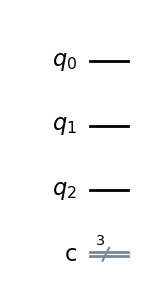

In [30]:
# create a quantum circuit with 3 qubits and 3 classical bits
circuit_1 = QuantumCircuit(3, 3)

# visualize the circuit
circuit_1.draw(output='mpl')

<b>Measurements</b> are used to obtain classical information from a quantum circuit. They work by collapsing the quantum state of a qubit into one of its <b>basis states</b> (either `|0⟩` or `|1⟩`, which correspond to `0` and `1` in classical computing).

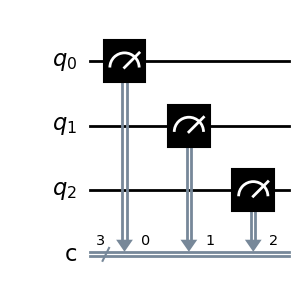

In [31]:
# get measurements from qubits 0, 1 and 2 to classical bits 0, 1 and 2
circuit_1.measure([0, 1, 2], [0, 1, 2])

circuit_1.draw(output='mpl')

We can use a <b>quantum simulator</b> to run our circuit locally on our machine, instead of running it on IBM's quantum hardware.

For this, we can use Qiskit's built-in simulator <i>Aer</i> to create a simulator object.

In [32]:
# set up simulator to run circuit

from qiskit.providers.aer import AerSimulator
simulator = AerSimulator()

# or you can use

from qiskit import Aer
simulator = Aer.get_backend('aer_simulator')

To execute our quantum circuit, we can run it on the simulator we created.

In [32]:
# run circuit on simulator

job = simulator.run(circuit_1)
result = job.result()
result.get_counts()

{'000': 1024}

The `get_counts()` method of the `result` objects returns a dictionary with the counts of different outcomes (outputs) made by the circuit when it was run.

Each key in the dictionary is an outcome of running the circuit, while the corresponding value shows how many times the outcome was observed.

In the above case, we have not applied any quantum gates on the qubits, and by convention, qubits start off at the state `|0⟩`. Thus, we can only observe `'000'` (for each of the 3 qubits on the quantum circuit). This measurement was made 1024 times, since the simulator object gets executed 1024 times by default, i.e. the circuit has run 1024 times, and all 1024 times it has provided the outcome of `'000'`.

## The X Gate

The `X` gate is the quantum equivalent of the `NOT`gate in Boolean logic. It flips the quantum state of a qubit. This is really useful in encoding information using quantum circuit. To see how this works, let's see how `X` gates can be used to encode `011` using qubits.

In [13]:
# create new quantum circuit with 3 qubits and 3 classical bits
circuit_2 = QuantumCircuit(3, 3)

Let's add `X` gates to the first two qubits to switch their state from `|0⟩` to `|1⟩`.

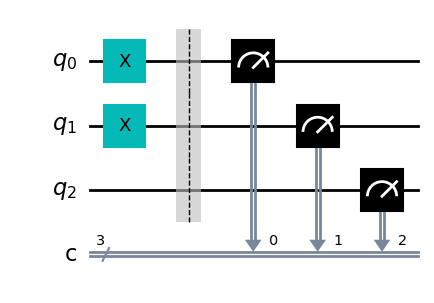

In [14]:
# add X gates to first 2 qubits
circuit_2.x([0, 1])

# add a barrier (to separate the X gates from the measurement)
circuit_2.barrier()

# add measurements
circuit_2.measure([0, 1, 2], [0, 1, 2])

circuit_2.draw(output='mpl')

Finally, we can run this circuit to see what its output looks like.

In [35]:
# run the circuit on the simulator

job = simulator.run(circuit_2)
result = job.result()
result.get_counts()

{'011': 1024}

## The CNOT Gate

The `CNOT` (Controlled-NOT) or `CX` gate is the quantum equivalent of the `XOR` gate in classical computing. The `CX` gate is a two-qubit gate; it takes in two qubits as inputs, namely the <b>control</b> qubit and the <b>target</b> qubit. The easiest way to remember how the `CX` gate works is:

> <i>When the control is |1⟩, the result is the complement of the target.</i>
> 
> <i>Else, the result is the target.</i>

This is illustrated in the tables given below:

| Control | Target | Result |
| ------- | ------ | ------ |
| 0       | 0      | 0      |
| 0       | 1      | 1      |
| 1       | 0      | 1      |
| 1       | 1      | 0      |

| Target | Control | Result |
| ------ | ------- | ------ |
| 0      | 0       | 0      |
| 0      | 1       | 1      |
| 1      | 0       | 1      |
| 1      | 1       | 0      |

Notice the similarity between these tables and the truth table for the `XOR` gate:

| A (Input 1) | B (Input 2) | A XOR B |
| ------- | ------ | ------ |
| 0       | 0      | 0      |
| 0       | 1      | 1      |
| 1       | 0      | 1      |
| 1       | 1      | 0      |

Let's see this gate in action in a circuit. Suppose we have a circuit where we have encoded `10` using two qubits and an `X gate`, and we want to check what happens when we apply a `CNOT` gate across the two qubits.

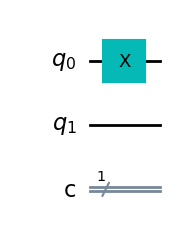

In [27]:
# creating quantum circuit with 2 qubits and 2 classical bits
circuit_3 = QuantumCircuit(2, 1)

# adding X gate to qubit 0
circuit_3.x(0)

circuit_3.draw(output='mpl')

After we have encoded `10` properly, we can add a `CNOT` gate to the circuit, get measurements and verify it against the tables given above.

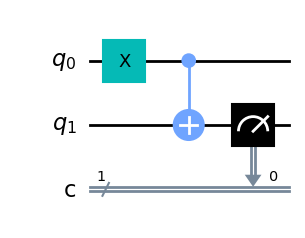

In [28]:
# adding a CX gate to qubits 0 (control) and 1 (target)
circuit_3.cx(0, 1)

# adding measurements to qubit 1 (target)
circuit_3.measure(1, 0)

circuit_3.draw(output='mpl')

Here, it must be noted that `q0` (the wire with the small circle) acts as the control and `q1` (the wire with the large circle with a cross on it) acts as the target.

Next, we'll run the circuit and get measurements.

In [29]:
# set up simulator

from qiskit import Aer
simulator = Aer.get_backend('aer_simulator')

# run circuit on simulator

result = simulator.run(circuit_3).result()
result.get_counts()

{'1': 1024}

We can clearly see that the quantum state of `q1` (which was `|0⟩` by default) has been changed to `|1⟩` by the application of the `CX` gate. This result also correlates with the rows in the above tables where the control is 1 and the target is 0.

If we want to separate our measurement from our inputs (i.e. obtain measurements for `CNOT` without collapsing the quantum states of the inputs), we can do so by using two `CNOT` gates and an additional quantum wire, which will store the result of the `CNOT` operation on the inputs.

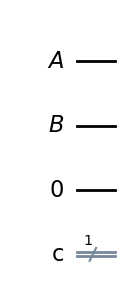

In [55]:
# create a quantum circuit
circuit_4 = QuantumCircuit(0, 1)

# add 3 quantum wires (labeled for demonstration purpose)

wire_a = QuantumRegister(1, 'A')
wire_b = QuantumRegister(1, 'B')
wire_0 = QuantumRegister(1, '0')

circuit_4.add_register(wire_a)
circuit_4.add_register(wire_b)
circuit_4.add_register(wire_0)

circuit_4.draw(output='mpl')

First, we add a `CNOT` to wire `0` (which is in the default |0⟩ state) with wire `A` as the control. This results in the state of wire `0` changing to `A XOR 0`, which is `A`.

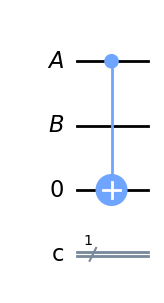

In [56]:
# add CX gate to wire A (control) and wire 0 (control)
circuit_4.cx(wire_a, wire_0)

circuit_4.draw(output='mpl')

Next, we apply another `CNOT` gate to wire `0` (which is now practically the same as wire `A`), but this time, wire `B` is the control. Thus, we end up with `B XOR 0`, which is now `B XOR A` because the first `CNOT` gate. This is the same as `A XOR B`.

We can then get a measurement from wire `0`, which now stores `A XOR B`.

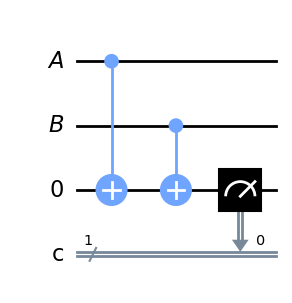

In [57]:
# add CX gate to wire B (control) and wire 0 (control)
circuit_4.cx(wire_b, wire_0)

# get measurement
circuit_4.measure(wire_0, 0)

circuit_4.draw(output='mpl')

## The Toffoli Gate

The Toffoli gate, which is also commonly known as the <b>Controlled-Controlled-NOT</b> gate (`CCNOT` gate or `CCX` gate) is a <b>three-qubit gate</b> where two qubits act as controls, while the remaining qubit acts as the target.

The Toffoli gate performs a `CNOT` operation on the target when both controls are in the state of |1⟩. In other words,

> <i>The result is the complement of the target when both controls are |1⟩.</i>
>
> <i>Else, the result is the target.</i>

The Toffoli gate's truth table is as follows:

| Control 1 | Control 2 | Target | Result |
| --------- | --------- | ------ | ------ |
| 0         | 0         | 0      | 0      |
| 0         | 0         | 1      | 1      |
| 0         | 1         | 0      | 0      |
| 0         | 1         | 1      | 1      |
| 1         | 0         | 0      | 0      |
| 1         | 0         | 1      | 1      |
| 1         | 1         | 0      | 1      |
| 1         | 1         | 1      | 0      |

To see the Toffoli gate in action, let's consider a quantum circuit with two control wires in the |1⟩ state and a target wire in the default state |0⟩.

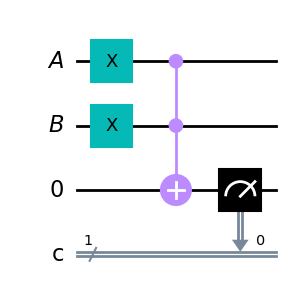

In [64]:
# create a quantum circuit
circuit_5 = QuantumCircuit(0, 1)

# add 3 quantum wires (labeled for demonstration purpose)

wire_a = QuantumRegister(1, 'A')
wire_b = QuantumRegister(1, 'B')
wire_0 = QuantumRegister(1, '0')

circuit_5.add_register(wire_a)
circuit_5.add_register(wire_b)
circuit_5.add_register(wire_0)

# add X gates to controls to flip them to |1⟩
circuit_5.x(wire_a)
circuit_5.x(wire_b)

# add Toffoli gate to circuit
circuit_5.ccx(wire_a, wire_b, wire_0)

# get measurement from target wire
circuit_5.measure(wire_0, 0)

circuit_5.draw(output='mpl')

Now, we can run the circuit and observe that the Toffoli gate flips the target to |1⟩.

In [68]:
# set up simulator and run the circuit

from qiskit import Aer
simulator = Aer.get_backend('aer_simulator')

result = simulator.run(circuit_5).result()
result.get_counts()

{'1': 1024}

The Toffoli gate can be represented as a matrix as given below:

\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
\end{bmatrix}